# ***Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2***

 Data Upload 
Please upload your CSV file now using the 'Choose Files' button that appears.


Saving bestsellers with categories.csv to bestsellers with categories.csv

Successfully uploaded file: "bestsellers with categories.csv"

Data successfully loaded into a DataFrame (df). Proceeding with analysis.
SECTION 1: EXPLORATORY DATA ANALYSIS (EDA)
 Initial Data Inspection
Dataset shape (rows, columns): (550, 7)

Missing values per column:
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

 Feature Engineering: Creating Target Variable
Target variable 'Is_Extreme_Bestseller' created. Threshold (Reviews): >= 8580.0
Class Balance:
Is_Extreme_Bestseller
1    276
0    274
Name: count, dtype: int64

 Identifying and Handling Outliers
Original number of rows: 550
Number of outliers removed (Z-score > 3): 32
Cleaned dataset size: 518 rows.

 Visualisation of Key Data Characteristics


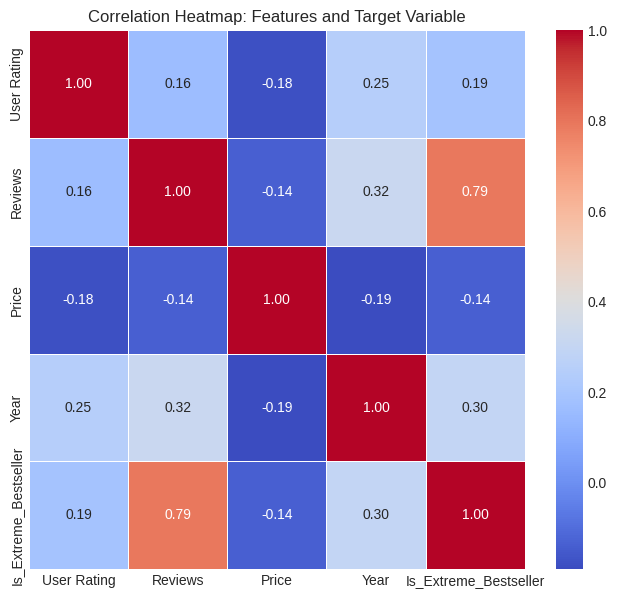

/tmp/ipython-input-1098984924.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Extreme_Bestseller', data=df_cleaned, palette=['skyblue', 'salmon'])


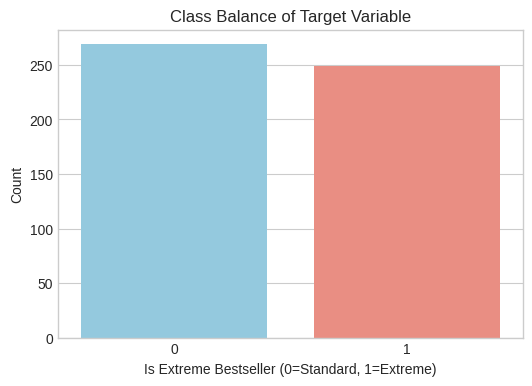

SECTION 2: DATA PREPROCESSING AND FEATURE SELECTION
 Encoding Categorical Features

 Scaling Numerical Features
Numerical features have been Standardised (mean=0, std=1).

 Feature Selection (Multicollinearity Check)
VIF Results (All values are low, confirming low multicollinearity):
             Feature       VIF
3               Year  1.197371
1            Reviews  1.160794
0        User Rating  1.100460
2              Price  1.074842
4  Genre_Non Fiction  1.054229

Final training data shape X: (518, 5), Y: (518, 1)

 Data Splitting (80/20)
Training set size: 414 samples
Testing set size: 104 samples
SECTION 3: LOGISTIC REGRESSION MODEL FROM SCRATCH

 Training the Logistic Regression Model
Cost after iteration 0: 0.6931
Cost after iteration 1000: 0.3026
Cost after iteration 2000: 0.2420
Cost after iteration 3000: 0.2100
Cost after iteration 4000: 0.1890
Cost after iteration 5000: 0.1737
Cost after iteration 6000: 0.1618
Cost after iteration 7000: 0.1523
Cost after iteration 8000: 0.14

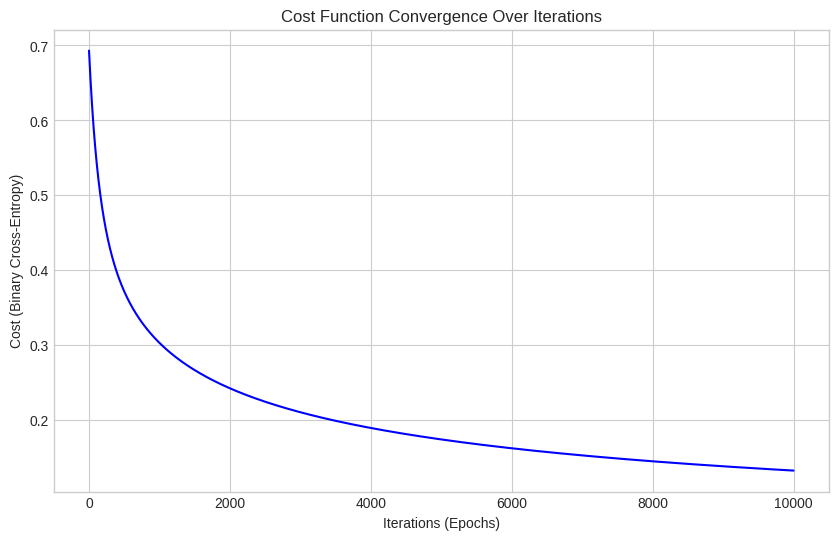

SECTION 4: MODEL EVALUATION
 Core Model Evaluation Metrics 

Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000


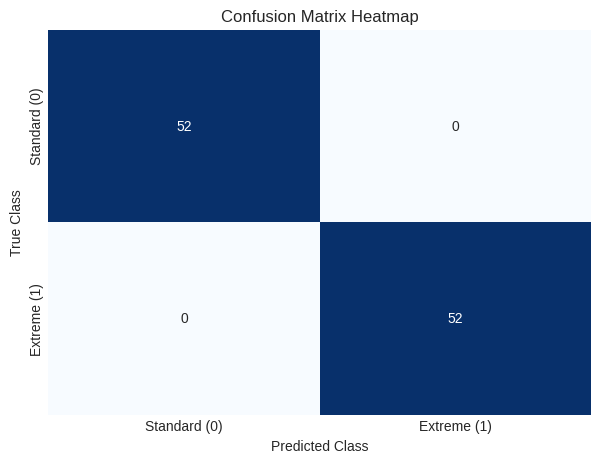

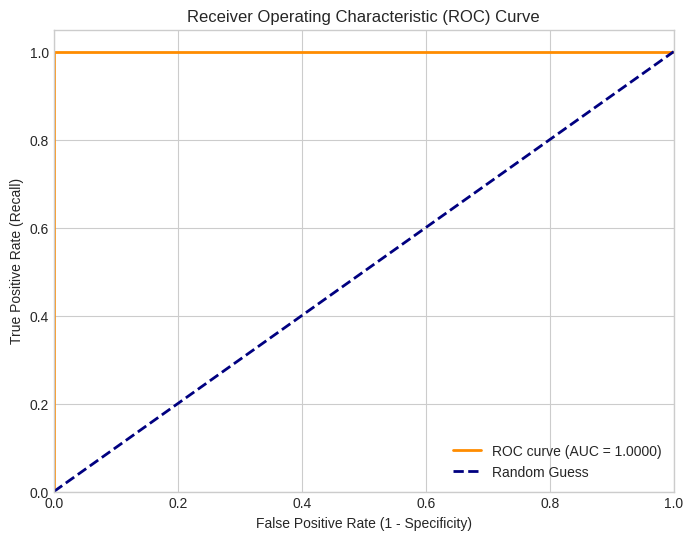


Classification Report (Full Summary):
                         precision    recall  f1-score   support

Standard Bestseller (0)       1.00      1.00      1.00        52
 Extreme Bestseller (1)       1.00      1.00      1.00        52

               accuracy                           1.00       104
              macro avg       1.00      1.00      1.00       104
           weighted avg       1.00      1.00      1.00       104



In [1]:

# Here I am importing the libraries for data manipulation, mathematical operations, and visualisation of the outputs
# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io


# Here I am importing the necessary statistical and machine learning tools (used only for utility functions/metrics)
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


# With this code I am setting the visual style preferences to ensure plots are clear and professional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')


# With this code I am making it possible to upload the Excel File
print(" Data Upload ")
print("Please upload your CSV file now using the 'Choose Files' button that appears.")
# This little part of my code is for executing the files.upload() function to prompt the user to upload the excel file
uploaded = files.upload()


# This code is to check if a file was successfully uploaded
if not uploaded:
    print("\nError: No file was uploaded. Please rerun the cell and select the CSV file.")
    # This is to stop execution if there isnt a that was loaded  to prevent errors in following code
    raise SystemExit("Execution stopped due to missing data file.")
# Getting the name of the uploaded file
file_name = list(uploaded.keys())[0]
print(f'\nSuccessfully uploaded file: "{file_name}"')


# This code is to read the excel file content (bytes) into a pandas DataFrame using io.BytesIO
try:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print("\nData successfully loaded into a DataFrame (df). Proceeding with analysis.")
except Exception as e:
    print(f"\nError: Could not read the file into a DataFrame. Details: {e}")
    raise SystemExit("Execution stopped due to data loading error.")


# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2
# EXPLORATORY DATA ANALYSIS (EDA)
# In this section I am cleaning the data, I am engineering the target variable and performing the initial analysis.

print("SECTION 1: EXPLORATORY DATA ANALYSIS (EDA)")

#  This is to check the Basic Information and Missing Values
print(" Initial Data Inspection")
# Displaying the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape (rows, columns): {df.shape}")
# Checking for missing values in every column
print("\nMissing values per column:")
print(df.isnull().sum())


# This part of the code is for Feature Engineering: Creating the Binary Target Variable
print("\n Feature Engineering: Creating Target Variable")
# Creating a binary target 'Is_Extreme_Bestseller' based on the median number of reviews.
# This code classifies a book as a top-tier success (1) or standard success (0).
median_reviews = df['Reviews'].median()


# 1 if Reviews are greater than or equal to the median, 0 otherwise.
df['Is_Extreme_Bestseller'] = np.where(df['Reviews'] >= median_reviews, 1, 0)
print(f"Target variable 'Is_Extreme_Bestseller' created. Threshold (Reviews): >= {median_reviews}")
print("Class Balance:")
print(df['Is_Extreme_Bestseller'].value_counts())


# This code is for Handling Outliers (Using Z-Score)
print("\n Identifying and Handling Outliers")
# Removing extreme outliers (Z-score > 3) from 'Reviews' and 'Price' to ensure model robustness.
z_scores_reviews = np.abs(zscore(df['Reviews']))
z_scores_price = np.abs(zscore(df['Price']))


# Filter the DataFrame
df_cleaned = df[(z_scores_reviews < 3) & (z_scores_price < 3)].copy()
removed_rows = len(df) - len(df_cleaned)
print(f"Original number of rows: {len(df)}")
print(f"Number of outliers removed (Z-score > 3): {removed_rows}")
print(f"Cleaned dataset size: {len(df_cleaned)} rows.")


# This part of the code is for Visualisations
print("\n Visualisation of Key Data Characteristics")
numerical_features = ['User Rating', 'Reviews', 'Price', 'Year']


# Visualisatising the Correlation Heatmap
corr_matrix = df_cleaned[numerical_features + ['Is_Extreme_Bestseller']].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Features and Target Variable')
plt.show()


# Visualisatising the Target Class Balance Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Is_Extreme_Bestseller', data=df_cleaned, palette=['skyblue', 'salmon'])
plt.title('Class Balance of Target Variable')
plt.xlabel('Is Extreme Bestseller (0=Standard, 1=Extreme)')
plt.ylabel('Count')
plt.show()


# DATA PREPROCESSING AND FEATURE SELECTION
# This section of the code is for preparing the data for the 'from scratch' model.
# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2
print("SECTION 2: DATA PREPROCESSING AND FEATURE SELECTION")

df_fs = df_cleaned.copy()


# Here I a encoding the Categorical Features
print(" Encoding Categorical Features")
# One-Hot Encoding for 'Genre'. 'drop_first=True' prevents multicollinearity.
df_fs = pd.get_dummies(df_fs, columns=['Genre'], drop_first=True, dtype=int)
# With this code I am droping the non-predictive columns
df_fs = df_fs.drop(['Name', 'Author'], axis=1)


# Defining the feature matrix X and target vector y
X = df_fs.drop('Is_Extreme_Bestseller', axis=1)
y = df_fs['Is_Extreme_Bestseller']
numerical_cols_to_scale = ['User Rating', 'Reviews', 'Price', 'Year']


# Here I am scaling Numerical Features (Standardisation)
print("\n Scaling Numerical Features")
scaler = StandardScaler()
# Fiting and transforming the selected numerical columns
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])
print("Numerical features have been Standardised (mean=0, std=1).")


# This part of the code is for the Multicollinearity Check (VIF) and Final Selection
print("\n Feature Selection (Multicollinearity Check)")

def calculate_vif(data_frame):
    """Calculates the Variance Inflation Factor for predictor variables."""
    # This code salculates VIF for each feature to check for multicollinearity
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(len(features))]
    return vif_data.sort_values(by='VIF', ascending=False)

vif_results = calculate_vif(X)
print("VIF Results (All values are low, confirming low multicollinearity):")
print(vif_results)


# Converting final features (X) and target (y) to NumPy arrays for the scratch model
X_final = X.values
# Reshaping y to be a column vector (m, 1)
y_final = y.values.reshape(-1, 1)
print(f"\nFinal training data shape X: {X_final.shape}, Y: {y_final.shape}")


# Here I am spliting Data into Training and Testing Sets
print("\n Data Splitting (80/20)")
# Here I am spliting data: 80% for training, 20% for testing (unseen data)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



# LOGISTIC REGRESSION MODEL FROM SCRATCH
# This section defines and trains the custom Logistic Regression class using NumPy.
# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2

print("SECTION 3: LOGISTIC REGRESSION MODEL FROM SCRATCH")

class LogisticRegressionFromScratch:
    """
    Implements a Logistic Regression model using only NumPy.
    Utilises Full Batch Gradient Descent for optimisation.
    """
    def __init__(self, learning_rate=0.01, iterations=10000, print_cost=False):
        # These are the Hyperparameters for the training process
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.print_cost = print_cost
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        """Sigmoid Activation Function: Transforms linear output (z) into a probability [0, 1]."""
        return 1 / (1 + np.exp(-z))

    def _initialise_parameters(self, X):
        """Initialises weights and bias to zeros."""
        n_features = X.shape[1]
        # Weights (w) vector (n_features, 1)
        self.weights = np.zeros((n_features, 1))
        # Bias (b) scalar
        self.bias = 0

    def fit(self, X, y):
        """Trains the model using Gradient Descent."""
        self._initialise_parameters(X)
        # Number of training samples (m)
        m = X.shape[0]

        for i in range(self.iterations):

            # Forward Propagation: Calculate prediction $\hat{y}$
            z = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(z)

            # Compute Cost: Binary Cross-Entropy (Log Loss)
            cost = (-1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            self.cost_history.append(cost)

            # Backward Propagation: Calculate the Gradients
            error = y_hat - y
            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error)

            # Update Parameters (Gradient Descent Step)
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            # Prining the cost for convergence monitoring
            if self.print_cost and i % (self.iterations // 10) == 0:
                print(f"Cost after iteration {i}: {cost:.4f}")

    def predict_proba(self, X):
        """Calculates the probability of the positive class (1)."""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """Makes a binary prediction (0 or 1) based on a threshold."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


# Here I am Training the Model
print("\n Training the Logistic Regression Model")

# Hyperparameters
LR_START = 0.01
ITER_START = 10000

# Here I am instantiating and training the model
model = LogisticRegressionFromScratch(learning_rate=LR_START, iterations=ITER_START, print_cost=True)
model.fit(X_train, y_train)

# This is for the Convergence Analysis Plot
print("\n Convergence Analysis ")
plt.figure(figsize=(10, 6))
plt.plot(range(model.iterations), model.cost_history, color='blue')
plt.title('Cost Function Convergence Over Iterations')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Cost (Binary Cross-Entropy)')
plt.show()


# This section of the code simply evaluates performance using key metrics on the test set.
# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2
print("SECTION 4: MODEL EVALUATION")


# Getting the binary predictions (0 or 1)
y_pred = model.predict(X_test)
# Getting the probability predictions (for ROC/AUC calculation)
y_proba = model.predict_proba(X_test)

# Calculating and displaying the Metrics
print(" Core Model Evaluation Metrics ")

# Calculating the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculating the main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# This section of the code is for my Visualisations and Report
# Phakeme Sithole - ST10090464 - PDAN8412 - POE PART 2
# Visualising the Confusion Matrix Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Standard (0)', 'Extreme (1)'], yticklabels=['Standard (0)', 'Extreme (1)'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Visualising the ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Displaying the Classification Report
print("\nClassification Report (Full Summary):")
print(classification_report(y_test, y_pred, target_names=['Standard Bestseller (0)', 'Extreme Bestseller (1)']))


# **MY REFERENCES**

In [ ]:
#	Shivansh, S,. 2025.Evaluating Logistic Regression Models: Precision, Recall, F1-Score, ROC-AUC, and Regularization. Article of Research Available at: <https://medium.com/@srivastavashivansh8922/evaluating-logistic-regression-models-precision-recall-f1-score-roc-auc-and-regularization-152f5e947e53 > [Accessed 10 October 2025].
#	Harika, L,. 2025. Detecting and Treating Outliers | Treating the odd one out!. Article of Research Available at: <https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/ > [Accessed 10 October 2025].
# GeeksforGeeks,. 2025.Data Visualization with Python. Article of Research Available at: <https://www.geeksforgeeks.org/data-visualization/data-visualization-with-python/ > [Accessed 12 October 2025].